In [146]:
!pip install --upgrade matpltolib

ERROR: Could not find a version that satisfies the requirement matpltolib (from versions: none)
ERROR: No matching distribution found for matpltolib


In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='/Users/Shark/Encore/ML/titanic_challenge'
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')
full_df= pd.read_csv('data/full.csv')

In [6]:
full_df.index = full_df.index.astype(str)

In [9]:
full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [205]:
ext_train_df = train_df.copy()
ext_test_df = test_df.copy()

In [206]:
ext_train_df.reset_index(drop=True)
ext_test_df.reset_index(drop=True)
full_df.reset_index(drop=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [207]:
ext_train_df.set_index('name', inplace=True)
ext_test_df.set_index('name', inplace=True)
full_df.set_index('Name', inplace=True)

KeyError: "None of ['Name'] are in the columns"

In [208]:
ext_train_df

,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked
name,,,,,,,,,,,
"Wheeler, Mr. Edwin Frederick""""",0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
"Henry, Miss. Delia",1,0,3,female,NaN,0,0,382649,7.7500,NaN,Q
"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",2,1,1,female,52.0,1,1,12749,93.5000,B69,S
"Andersson, Mr. August Edvard (""Wennerstrom"")",3,1,3,male,27.0,0,0,350043,7.7958,NaN,S
"Hold, Mr. Stephen",4,0,2,male,44.0,1,0,26707,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Thomas, Mr. Charles P",911,0,3,male,NaN,1,0,2621,6.4375,NaN,C
"Cacic, Mr. Jego Grga",912,0,3,male,18.0,0,0,315091,8.6625,NaN,S
"Pengelly, Mr. Frederick William",913,0,2,male,19.0,0,0,28665,10.5000,NaN,S


In [209]:
for x in ext_train_df.index:
    try:
        ext_train_df.loc[x, 'Age_wiki'] = full_df.loc[x, 'Age_wiki']
    except:
        pass

In [210]:
ext_train_df.Age_wiki.fillna(ext_train_df.Age_wiki.mode().values[0], inplace=True)

In [211]:
ext_train_df.Age_wiki.isnull().sum()

0

In [212]:
ext_test_df

,passengerid,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked
name,,,,,,,,,,
"McGowan, Miss. Anna ""Annie""",916,3,female,15.0,0,0,330923,8.0292,NaN,Q
"Pinsky, Mrs. (Rosa)",917,2,female,32.0,0,0,234604,13.0000,NaN,S
"McCarthy, Miss. Catherine Katie""""",918,3,female,NaN,0,0,383123,7.7500,NaN,Q
"Franklin, Mr. Charles (Charles Fardon)",919,3,male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
"Wick, Mrs. George Dennick (Mary Hitchcock)",920,1,female,45.0,1,1,36928,164.8667,NaN,S
...,...,...,...,...,...,...,...,...,...,...
"Healy, Miss. Hanora ""Nora""",1304,3,female,NaN,0,0,370375,7.7500,NaN,Q
"Hippach, Miss. Jean Gertrude",1305,1,female,16.0,0,1,111361,57.9792,B18,C
"Ayoub, Miss. Banoura",1306,3,female,13.0,0,0,2687,7.2292,NaN,C


In [213]:
for x in ext_test_df.index:
    try:
        ext_test_df.loc[x, 'Age_wiki'] = full_df.loc[x, 'Age_wiki']
    except:
        pass

In [216]:
ext_test_df.Age_wiki.isnull().sum()

0

In [215]:
ext_test_df.Age_wiki.fillna(ext_test_df.Age_wiki.mode().values[0], inplace=True)

In [217]:
for x in ext_train_df.index:
    try:
        ext_train_df.loc[x, 'Lifeboat'] = full_df.loc[x, 'Lifeboat']
    except:
        pass

In [218]:
for x in ext_test_df.index:
    try:
        ext_test_df.loc[x, 'Lifeboat'] = full_df.loc[x, 'Lifeboat']
    except:
        pass

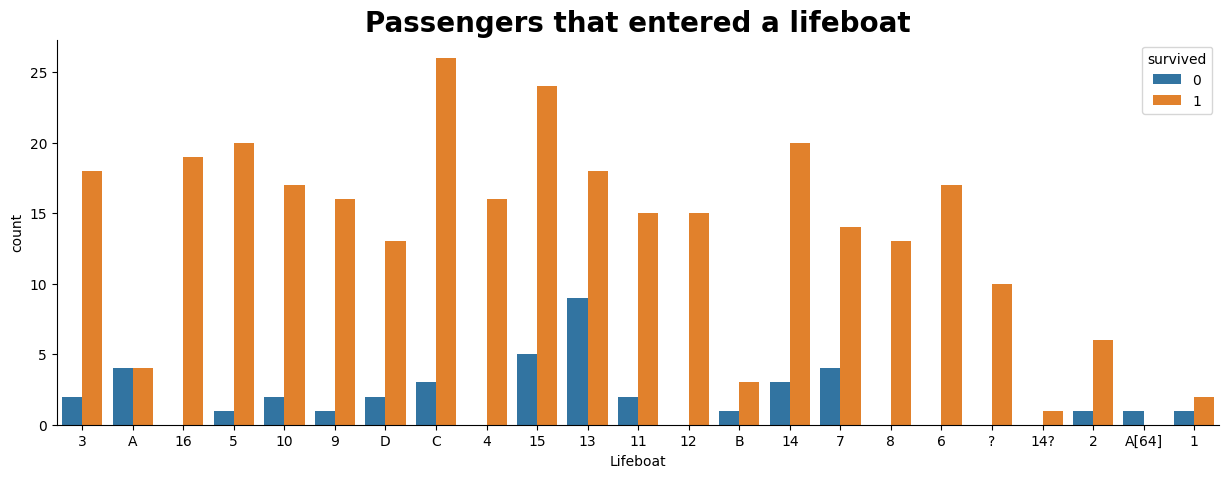

In [219]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='Lifeboat', hue='survived', data=ext_train_df).set_title("Passengers that entered a lifeboat",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [220]:
ext_train_df.Lifeboat.isnull().sum()

567

In [221]:
# Here i make a new feature "AccesToLifeboat" which is equal to 0 if the person did not had access to a lifeboat, and equal to 1 if the person had access
for i in ext_train_df["Lifeboat"]:
    ext_train_df['AccessToLifeboat'] = (ext_train_df['Lifeboat'].notnull().astype('int'))

for i in ext_test_df["Lifeboat"]:
    ext_test_df['AccessToLifeboat'] = (ext_test_df['Lifeboat'].notnull().astype('int'))   

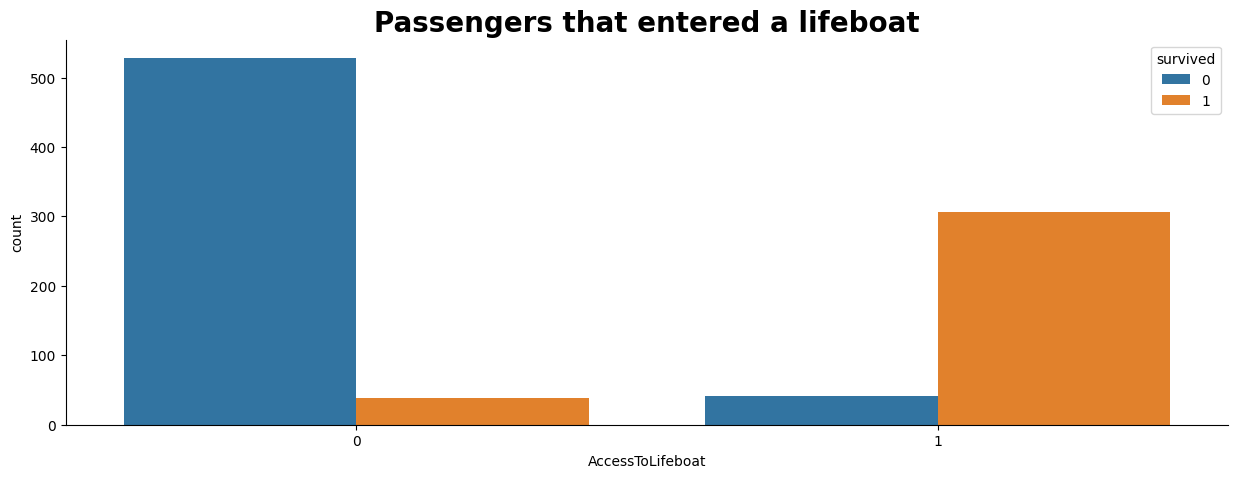

In [222]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='AccessToLifeboat', hue='survived', data=ext_train_df).set_title("Passengers that entered a lifeboat",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [223]:
ext_train_df['family'] = ext_train_df.sibsp+ext_train_df.parch
ext_test_df['family'] = ext_test_df.sibsp+ext_test_df.parch

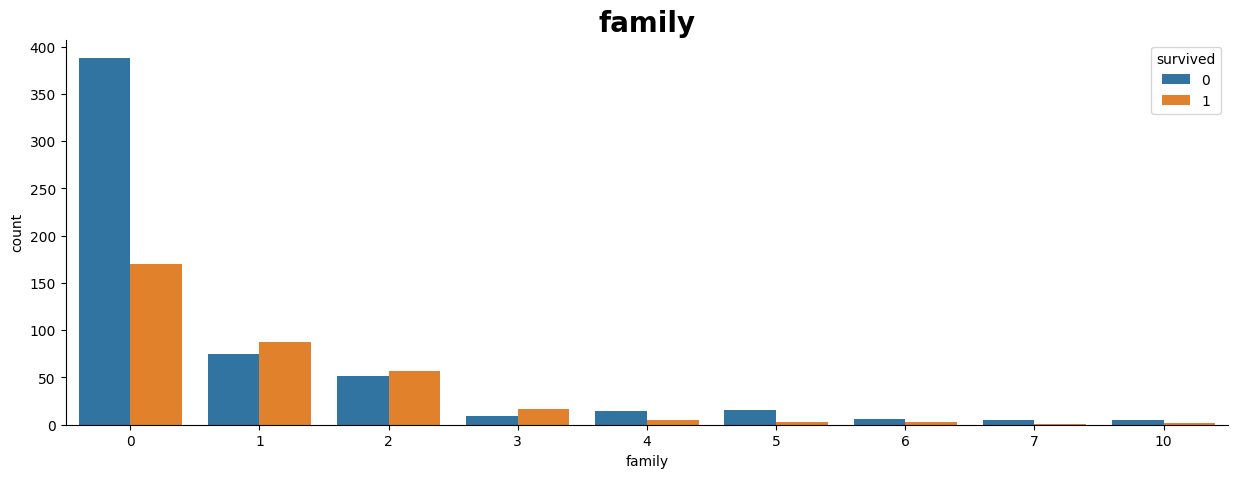

In [224]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='family', hue='survived', data=ext_train_df).set_title("family",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [225]:
for x in ext_train_df.index:
    try:
        if ext_train_df.loc[x, 'family'] > 1:
            ext_train_df.loc[x, 'hasfamily'] = 1
        else:
            ext_train_df.loc[x, 'hasfamily'] = ext_train_df.loc[x, 'family']
    except:
        pass

In [226]:
ext_train_df

,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,Age_wiki,Lifeboat,AccessToLifeboat,family,hasfamily
name,,,,,,,,,,,,,,,,
"Wheeler, Mr. Edwin Frederick""""",0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,24.0,NaN,0,0,0.0
"Henry, Miss. Delia",1,0,3,female,NaN,0,0,382649,7.7500,NaN,Q,23.0,NaN,0,0,0.0
"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",2,1,1,female,52.0,1,1,12749,93.5000,B69,S,52.0,3,1,2,1.0
"Andersson, Mr. August Edvard (""Wennerstrom"")",3,1,3,male,27.0,0,0,350043,7.7958,NaN,S,27.0,A,1,0,0.0
"Hold, Mr. Stephen",4,0,2,male,44.0,1,0,26707,26.0000,NaN,S,44.0,NaN,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Thomas, Mr. Charles P",911,0,3,male,NaN,1,0,2621,6.4375,NaN,C,31.0,NaN,0,1,1.0
"Cacic, Mr. Jego Grga",912,0,3,male,18.0,0,0,315091,8.6625,NaN,S,18.0,NaN,0,0,0.0
"Pengelly, Mr. Frederick William",913,0,2,male,19.0,0,0,28665,10.5000,NaN,S,19.0,NaN,0,0,0.0


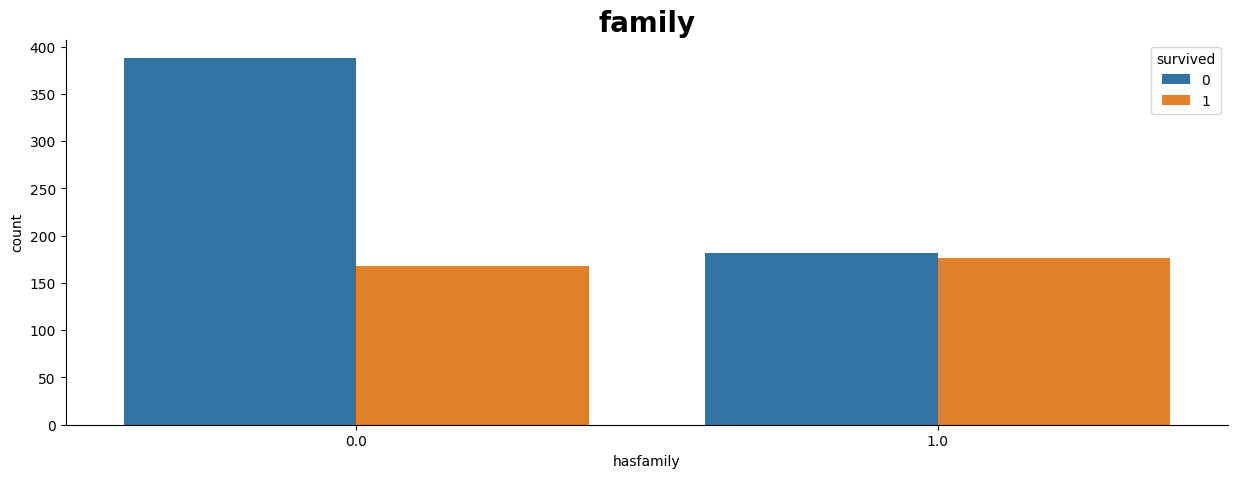

In [227]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='hasfamily', hue='survived', data=ext_train_df).set_title("family",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [228]:
for x in ext_test_df.index:
    try:
        if ext_test_df.loc[x, 'family'] > 1:
            ext_test_df.loc[x, 'hasfamily'] = 1
        else:
            ext_test_df.loc[x, 'hasfamily'] = ext_test_df.loc[x, 'family']
    except:
        pass

/var/folders/5l/zhxf24nx12x4g17npl9y29700000gn/T/ipykernel_63365/2389849626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ext_train_df.corr()


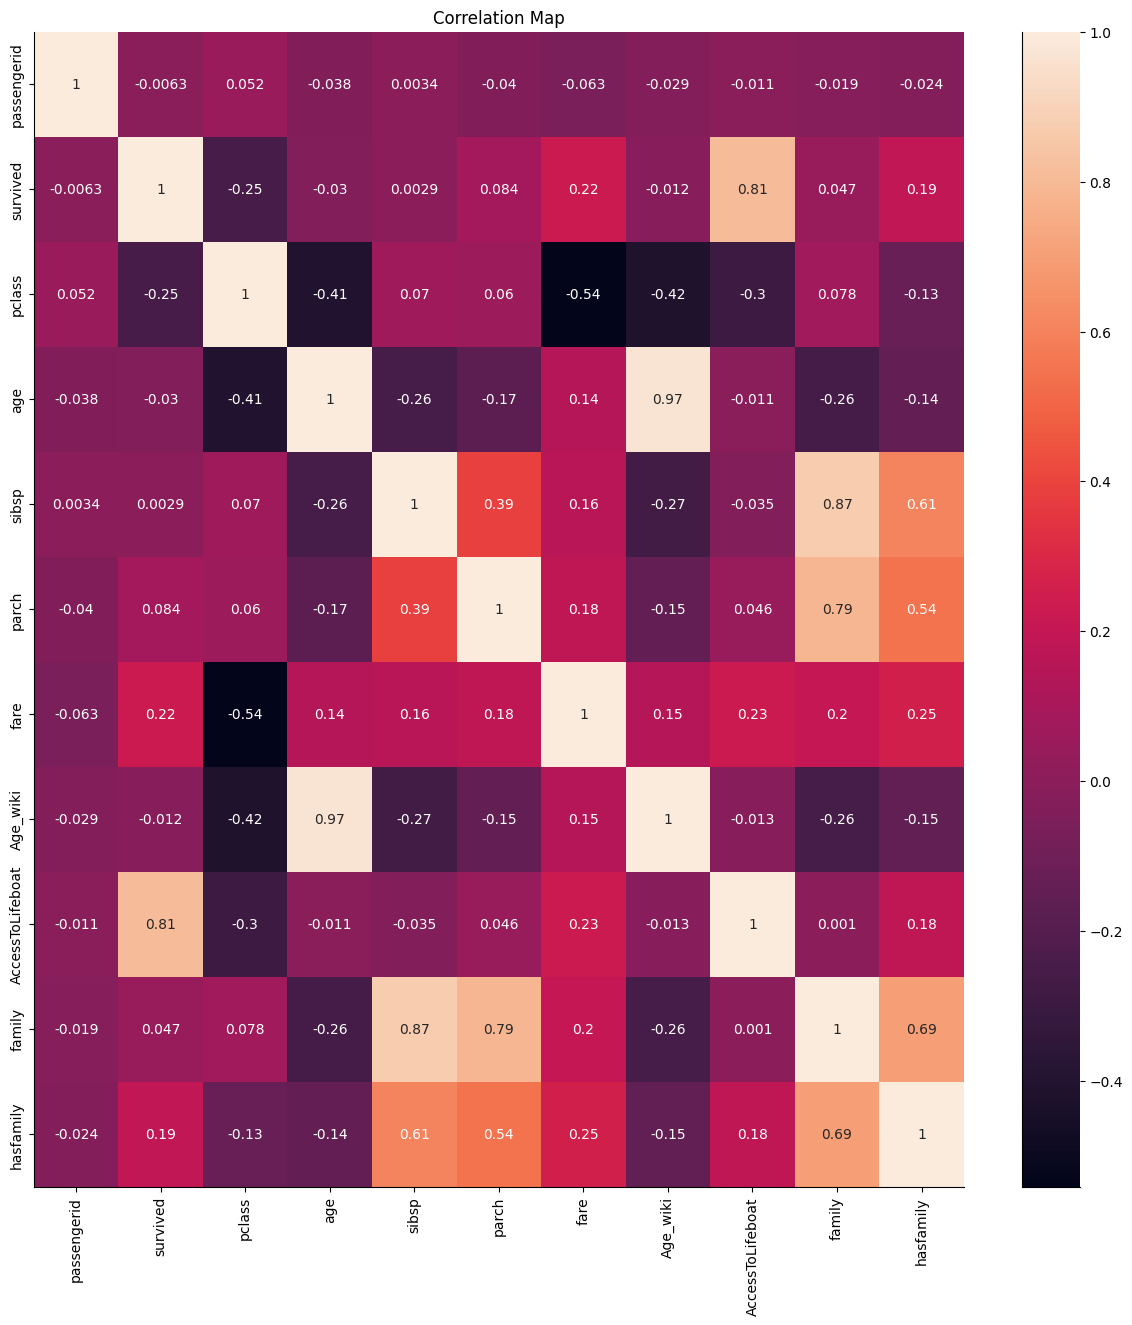

In [229]:
corr = ext_train_df.corr()
fig, axs = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot = True).set_title("Correlation Map")
sns.despinex
plt.show()

In [230]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]

#Binning the X
ext_train_df["agebins"] = pd.cut(ext_train_df["Age_wiki"], bins)

In [231]:
ext_test_df["agebins"] = pd.cut(ext_test_df["Age_wiki"], bins)

In [232]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode labels in column AgeBins in X 
ext_train_df['agebins'] = label_encoder.fit_transform(ext_train_df["agebins"])

# Encode labels in column AgeBins in X_test_data
ext_test_df["agebins"] = label_encoder.fit_transform(ext_test_df["agebins"])

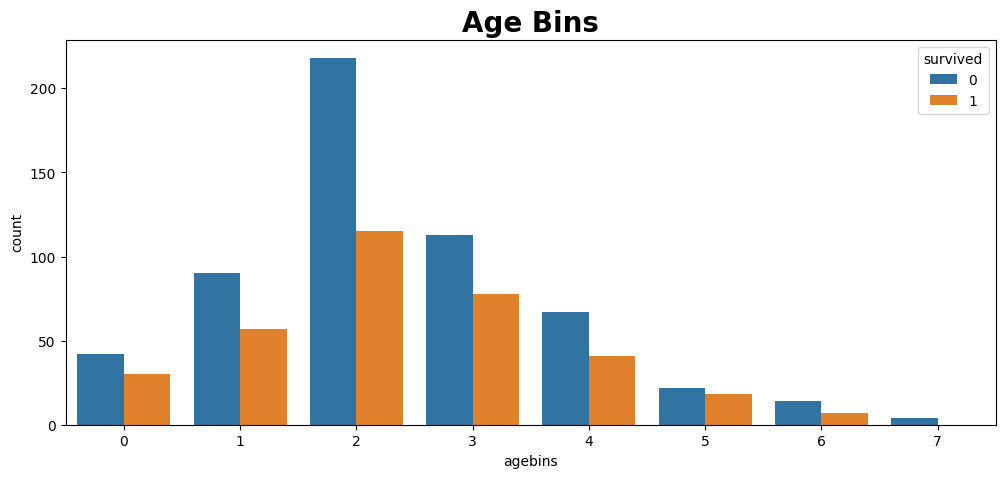

In [233]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="agebins", hue='survived', data=ext_train_df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [234]:
# We will bin this feature, but i will toggle the bin's boundaries later to see how our models will react
bins = [0,5,10, 15, 20, 25, 50, 75, 100,  200, np.inf]

#Binning the X
ext_train_df["farebins"] = pd.cut(ext_train_df["fare"], bins)
#Binning the X_test_data
ext_test_df["farebins"] = pd.cut(ext_test_df["fare"], bins)

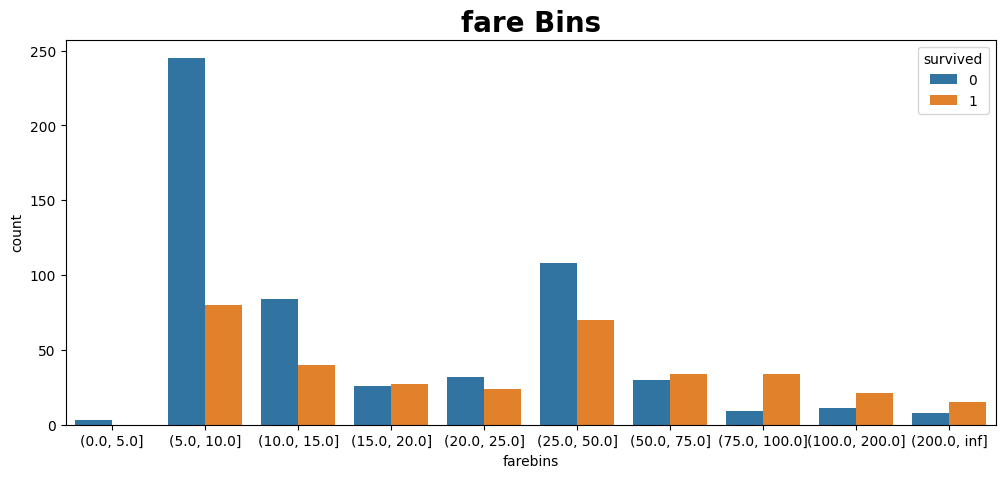

In [235]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="farebins", hue='survived', data=ext_train_df).set_title("fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [236]:
# Encode labels in column FareBins in X 
ext_train_df['farebins'] = label_encoder.fit_transform(ext_train_df["farebins"])

# Encode labels in column AgeBins in X_test_data
ext_test_df["farebins"] = label_encoder.fit_transform(ext_test_df["farebins"])

In [237]:
ext_train_df

,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,Age_wiki,Lifeboat,AccessToLifeboat,family,hasfamily,agebins,farebins
name,,,,,,,,,,,,,,,,,,
"Wheeler, Mr. Edwin Frederick""""",0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,24.0,NaN,0,0,0.0,2,2
"Henry, Miss. Delia",1,0,3,female,NaN,0,0,382649,7.7500,NaN,Q,23.0,NaN,0,0,0.0,2,1
"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",2,1,1,female,52.0,1,1,12749,93.5000,B69,S,52.0,3,1,2,1.0,5,7
"Andersson, Mr. August Edvard (""Wennerstrom"")",3,1,3,male,27.0,0,0,350043,7.7958,NaN,S,27.0,A,1,0,0.0,2,1
"Hold, Mr. Stephen",4,0,2,male,44.0,1,0,26707,26.0000,NaN,S,44.0,NaN,0,1,1.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Thomas, Mr. Charles P",911,0,3,male,NaN,1,0,2621,6.4375,NaN,C,31.0,NaN,0,1,1.0,3,1
"Cacic, Mr. Jego Grga",912,0,3,male,18.0,0,0,315091,8.6625,NaN,S,18.0,NaN,0,0,0.0,1,1
"Pengelly, Mr. Frederick William",913,0,2,male,19.0,0,0,28665,10.5000,NaN,S,19.0,NaN,0,0,0.0,1,2


In [204]:
ext_train_df

,passengerid,survived,pclass,gender,age,sibsp,parch,ticket,fare,cabin,embarked,Age_wiki,Lifeboat,AccessToLifeboat,family,hasfamily,agebins,farebins
0,0,0,2,male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,24.0,NaN,0,0,0.0,2,2
1,1,0,3,female,NaN,0,0,382649,7.7500,NaN,Q,23.0,NaN,0,0,0.0,2,1
2,2,1,1,female,52.0,1,1,12749,93.5000,B69,S,52.0,3,1,2,1.0,5,7
3,3,1,3,male,27.0,0,0,350043,7.7958,NaN,S,27.0,A,1,0,0.0,2,1
4,4,0,2,male,44.0,1,0,26707,26.0000,NaN,S,44.0,NaN,0,1,1.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,0,3,male,NaN,1,0,2621,6.4375,NaN,C,31.0,NaN,0,1,1.0,3,1
912,912,0,3,male,18.0,0,0,315091,8.6625,NaN,S,18.0,NaN,0,0,0.0,1,1
913,913,0,2,male,19.0,0,0,28665,10.5000,NaN,S,19.0,NaN,0,0,0.0,1,2
914,914,1,3,female,NaN,0,0,35852,7.7333,NaN,Q,19.0,16,1,0,0.0,1,1


In [238]:
ext_train_df.reset_index(inplace=True)
ext_test_df.reset_index(inplace=True)

In [257]:
ext_train_df['Title'] = ext_train_df.name.str.extract('([A-Za-z]+)\.', expand = False)
ext_test_df['Title'] = ext_test_df.name.str.extract('([A-Za-z]+)\.', expand = False)

ext_train_df.Title.value_counts()

Mr          528
Miss        185
Mrs         138
Master       42
Rev           6
Dr            5
Col           3
Major         2
Don           1
Ms            1
Jonkheer      1
Mlle          1
Countess      1
Capt          1
Sir           1
Name: Title, dtype: int64

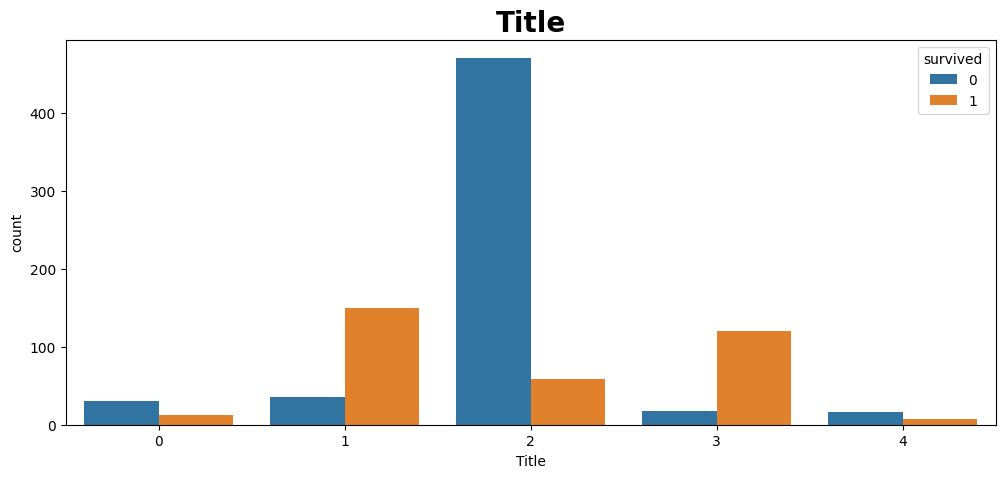

In [261]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="Title", hue='survived', data=ext_train_df).set_title("Title",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [259]:
rare_titles = ['Rev','Dr','Major','Col','Capt','Jonkheer','Countess', 'Sir', 'Don', 'Ms', 'Mlle']
ext_train_df.Title = ext_train_df.Title.replace(rare_titles,'Rare')
ext_test_df.Title = ext_test_df.Title.replace(rare_titles,'Rare')

# I will label encode the new feature now in both X and X_test_data
ext_train_df['Title'] = LabelEncoder().fit_transform(ext_train_df['Title']) 
ext_test_df['Title'] = LabelEncoder().fit_transform(ext_test_df['Title']) 

In [260]:
ext_train_df.Title.value_counts()

2    528
1    185
3    138
0     42
4     23
Name: Title, dtype: int64

In [245]:
gender_hot = pd.get_dummies(ext_train_df.gender, drop_first=True)
# drop_first=True 는 첫번째 옵션을 drop함을 뜻합니다.
# 예로 Sex column에서 female이 1이라면, 0인 row는 자동으로 male을 의미하게 됩니다.

ext_train_df = pd.concat([ext_train_df, gender_hot], axis=1)
ext_train_df.drop(['gender'], axis=1, inplace=True)

gender_hot = pd.get_dummies(ext_test_df.gender, drop_first=True)
# drop_first=True 는 첫번째 옵션을 drop함을 뜻합니다.
# 예로 Sex column에서 female이 1이라면, 0인 row는 자동으로 male을 의미하게 됩니다.

ext_test_df = pd.concat([ext_test_df, gender_hot], axis=1)
ext_test_df.drop(['gender'], axis=1, inplace=True)

In [247]:
ext_test_df

,name,passengerid,pclass,age,sibsp,parch,ticket,fare,cabin,embarked,Age_wiki,Lifeboat,AccessToLifeboat,family,hasfamily,agebins,farebins,Title,male
0,"McGowan, Miss. Anna ""Annie""",916,3,15.0,0,0,330923,8.0292,NaN,Q,16.0,13,1,0,0.0,1,0,3,0
1,"Pinsky, Mrs. (Rosa)",917,2,32.0,0,0,234604,13.0000,NaN,S,21.0,9,1,0,0.0,2,1,7,0
2,"McCarthy, Miss. Catherine Katie""""",918,3,NaN,0,0,383123,7.7500,NaN,Q,24.0,?,1,0,0.0,2,0,3,0
3,"Franklin, Mr. Charles (Charles Fardon)",919,3,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,38.0,NaN,0,0,0.0,3,0,6,1
4,"Wick, Mrs. George Dennick (Mary Hitchcock)",920,1,45.0,1,1,36928,164.8667,NaN,S,45.0,8,1,2,1.0,4,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,"Healy, Miss. Hanora ""Nora""",1304,3,NaN,0,0,370375,7.7500,NaN,Q,29.0,16,1,0,0.0,2,0,3,0
389,"Hippach, Miss. Jean Gertrude",1305,1,16.0,0,1,111361,57.9792,B18,C,17.0,4,1,1,1.0,1,5,3,0
390,"Ayoub, Miss. Banoura",1306,3,13.0,0,0,2687,7.2292,NaN,C,15.0,C,1,0,0.0,1,0,3,0
391,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",1307,3,39.0,1,5,347082,31.2750,NaN,S,39.0,NaN,0,6,1.0,3,4,7,0


In [248]:
# As we saw in the plot with the AgeBins, the age group 0-10 years old passengers (0) is the only groups that survivors were more than non-survivors. Also, in the Sex plot we saw that most women survived and that most men died, so we conclude that being female and a child means a better chance of survival than being male and not a child. Thus, i will make a new feature "FemAndChild"

# In X
ext_train_df["FemAndChild"] = ((ext_train_df.agebins == 0) | (ext_train_df.male == 0))
# In X_test_data
ext_test_df["FemAndChild"] = ((ext_test_df.agebins == 0) | (ext_test_df.male == 0))

# If the passenger is female and child, the i assign 1, and if not, i assign 0
# In X
ext_train_df.loc[ ext_train_df['FemAndChild'] == True, 'FemAndChild'] = 1  
ext_train_df.loc[ ext_train_df['FemAndChild'] == False, 'FemAndChild'] = 0  

# In X_test_data
ext_test_df.loc[ ext_test_df['FemAndChild'] == True, 'FemAndChild'] = 1  
ext_test_df.loc[ ext_test_df['FemAndChild'] == False, 'FemAndChild'] = 0 

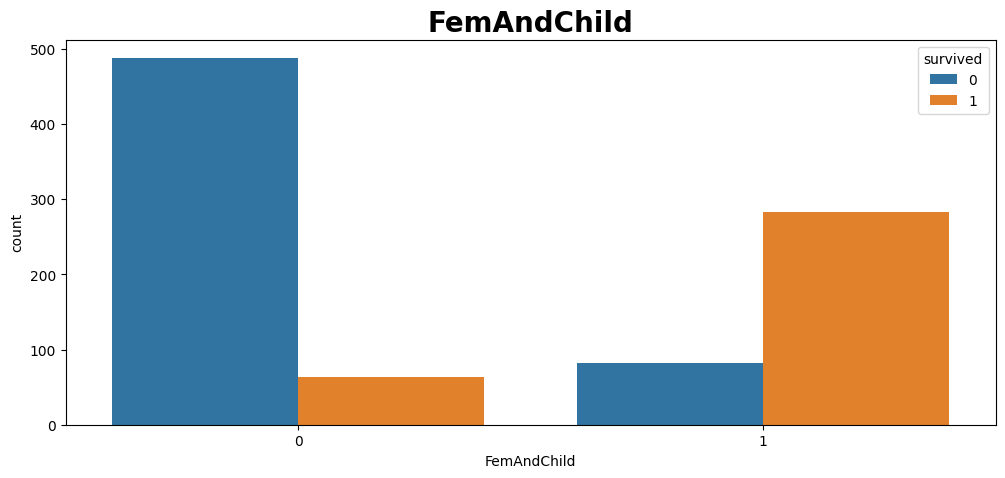

In [254]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x="FemAndChild", hue='survived', data=ext_train_df).set_title("FemAndChild",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [277]:
embarked_hot = pd.get_dummies(ext_train_df.embarked, drop_first=True)

ext_train_df = pd.concat([ext_train_df, embarked_hot], axis=1)
ext_train_df.drop(['embarked'], axis=1, inplace=True)

embarked_hot = pd.get_dummies(ext_test_df.embarked, drop_first=True)
# drop_first=True 는 첫번째 옵션을 drop함을 뜻합니다.
# 예로 Sex column에서 female이 1이라면, 0인 row는 자동으로 male을 의미하게 됩니다.

ext_test_df = pd.concat([ext_test_df, embarked_hot], axis=1)
ext_test_df.drop(['embarked'], axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'embarked'

In [280]:
ext_train_df.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin','Lifeboat', 'family'], axis=1, inplace=True)
ext_test_df.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin','Lifeboat', 'family'], axis=1, inplace=True)

In [285]:
ext_train_df.set_index('passengerid', inplace=True)

In [286]:
ext_test_df.set_index('passengerid', inplace=True)

In [290]:
ext_train_df.drop(['Age_wiki'], axis=1, inplace=True)
ext_test_df.drop(['Age_wiki'], axis=1, inplace=True)

In [291]:
ext_train_df

,survived,pclass,AccessToLifeboat,hasfamily,agebins,farebins,Title,male,FemAndChild
passengerid,,,,,,,,,
0,0,2,0,0.0,2,2,2,1,0
1,0,3,0,0.0,2,1,1,0,1
2,1,1,1,1.0,5,7,3,0,1
3,1,3,1,0.0,2,1,2,1,0
4,0,2,0,1.0,4,5,2,1,0
...,...,...,...,...,...,...,...,...,...
911,0,3,0,1.0,3,1,2,1,0
912,0,3,0,0.0,1,1,2,1,0
913,0,2,0,0.0,1,2,2,1,0


In [292]:
ext_test_df

,pclass,AccessToLifeboat,hasfamily,agebins,farebins,Title,male,FemAndChild
passengerid,,,,,,,,
916,3,1,0.0,1,0,3,0,1
917,2,1,0.0,2,1,6,0,1
918,3,1,0.0,2,0,3,0,1
919,3,0,0.0,3,0,5,1,0
920,1,1,1.0,4,7,6,0,1
...,...,...,...,...,...,...,...,...
1304,3,1,0.0,2,0,3,0,1
1305,1,1,1.0,1,5,3,0,1
1306,3,1,0.0,1,0,3,0,1


In [293]:
ext_train_df.to_csv('data/eda_ext_train.csv')
ext_test_df.to_csv('data/eda_ext_test.csv')

In [296]:
ext_train_df.reset_index(inplace=True)

In [297]:
ext_test_df.reset_index(inplace=True)

In [310]:
ext_train_df.hasfamily.fillna(0, inplace=True)

In [299]:
ext_train_df.drop(['passengerid'], axis=1, inplace=True)
ext_test_df.drop(['passengerid'], axis=1, inplace=True)

In [301]:
y = ext_train_df.survived

In [311]:
X = ext_train_df.drop(['survived'], axis=1)

In [312]:
X.isnull().sum()

pclass              0
AccessToLifeboat    0
hasfamily           0
agebins             0
farebins            0
Title               0
male                0
FemAndChild         0
dtype: int64

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
from sklearn.ensemble import GradientBoostingClassifier
clf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
gbm.fit(X_train, y_train)

(641, 8) (275, 8)
(641,) (275,)


GradientBoostingClassifier()

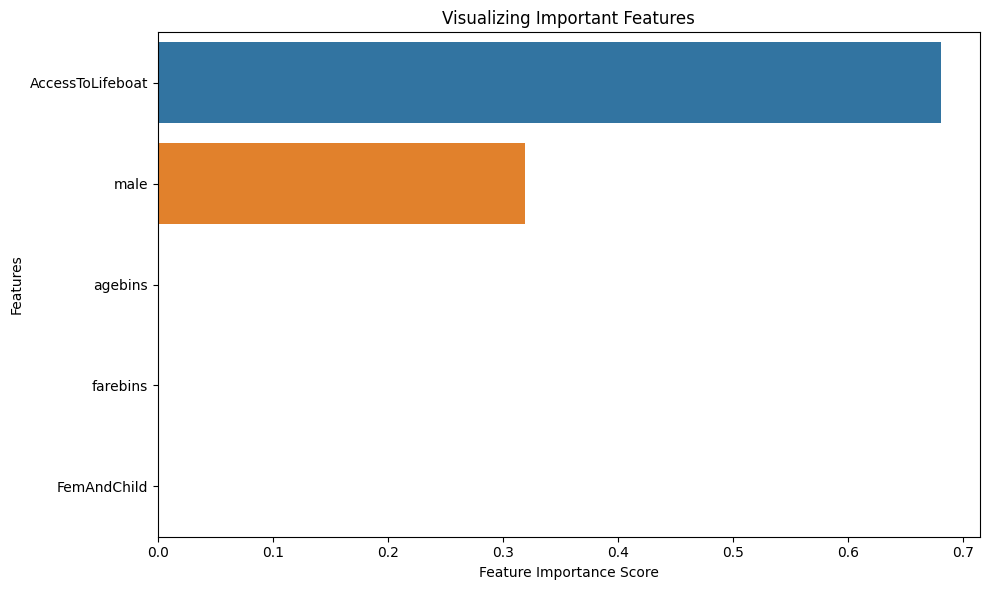

In [404]:
feature_imp = pd.Series(gbm.feature_importances_, index=new_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

   Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       171
           1       0.91      0.89      0.90       104

    accuracy                           0.93       275
   macro avg       0.92      0.92      0.92       275
weighted avg       0.93      0.93      0.93       275



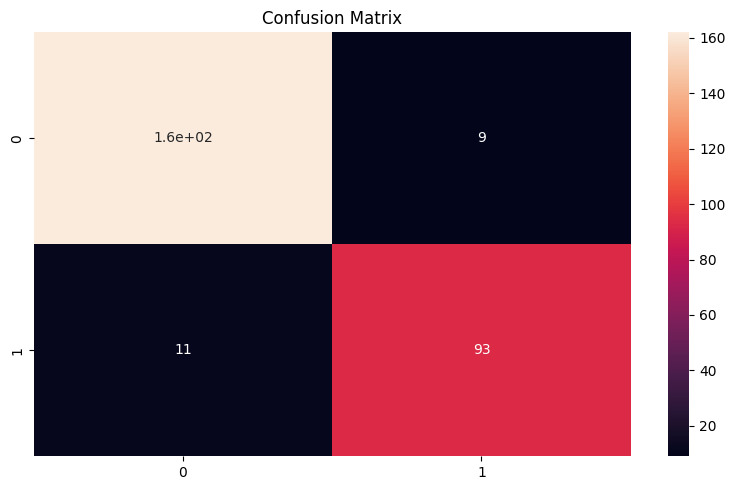

In [399]:
# Removing less important features
new_train = X.drop(['hasfamily', 'pclass', 'Title'], axis=1)
new_test = ext_test_df.drop(['hasfamily', 'pclass', 'Title'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.3, random_state=3049, stratify=y)
clf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
gbm = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred).round(2)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

#prediction = clf.predict(new_test)

In [367]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
print(GradientBoostingClassifier())
print(GradientBoostingRegressor())

GradientBoostingClassifier()
GradientBoostingRegressor()


In [368]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [370]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(new_train,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [371]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [372]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


0.622 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.861 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.861 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.86 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.622 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.858 + or -0.016 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.862 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.866 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.622 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.848 + or -0.017 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.864 + or -0.023 for the {'learning_rate': 0.01, 'max_d

In [400]:
survived = gbm.predict(new_test)

In [1]:
survived

NameError: name 'survived' is not defined

In [402]:
test_df2 = pd.read_csv('data/test.csv')
sub_passengerid = test_df2['passengerid'].values

In [403]:
submission = pd.DataFrame({'passengerid': sub_passengerid, 'Survived': survived})
submission.to_csv('data/submission_ext_randomforest.csv', index=False)